### Gradient Tape

In [13]:
import tensorflow as tf

In [11]:
test1 = [1,2,3]
test2 = [10, 20 ,30]

In [14]:
t1 = tf.Variable(test1, dtype=tf.float32)
t2 = tf.Variable(test2, dtype=tf.float32)

In [18]:
with tf.GradientTape() as tape :
  t3 = t1 * t2

gradient = tape.gradient(t3, [t1, t2])
print(gradient[0])
print(gradient[1])


tf.Tensor([10. 20. 30.], shape=(3,), dtype=float32)
tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)


###Gradient Tape basic ex2

In [19]:
test1 = [1,2,3]
test2 = [10, 20 ,30]

In [24]:
t1 = tf.constant(test1, dtype=tf.float32)
t2 = tf.Variable(test2, dtype=tf.float32)

with tf.GradientTape() as tape : # 원래 텐서는 Variable은 계산하지 않는다 하지만 watch 함수를 사용하면 Variable도 계산할 수 있다.
  tape.watch(t1)
  t3 = t1 * t2

gradients = tape.gradient(t3, [t1, t2])

In [25]:
print(gradients[0])

tf.Tensor([10. 20. 30.], shape=(3,), dtype=float32)


### Gradient Tape 이용한 linear regression

In [26]:
import matplotlib.pyplot as plt
import numpy as np


In [27]:
# 데이터 선언
x_data =[[1.],[2.],[3.],[4.]]
y_data =[[1.],[3.],[5.],[7.]]

In [28]:
## 평균 0, 분산 1의 파라미터의 정규분포로 부터 값을 가져옴.
# 학습을 통해 업데이트가 되어 변화되는 모델의 파라미터인 w,b를 의미한다.
W=tf.Variable(tf.random.normal((1,1),mean=0, stddev=1.0))
b=tf.Variable(tf.random.normal((1,1),mean=0, stddev=1.0))
lr=0.001
history = np.zeros([2000,3], 'float32')

In [29]:
w = np.array(W)
w = w.reshape(1)
B = np.array(b)
B = B.reshape(1)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


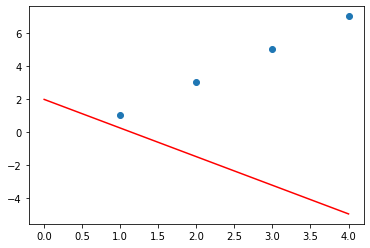

In [30]:
plt.plot(x_data, y_data, 'o')
plt.plot([0,4], [b, (w*4 +B)], 'r-')

In [31]:
w_trace = []
b_trace = []

In [ ]:
for epoch in range(2000):
    total_error = 0

    for x, y in zip(x_data, y_data):
        with tf.GradientTape() as tape:
            y_hat = W * x + b
            error = (y_hat - y) **2
        
        gradients = tape.gradient(error, [W, b]) 

        W = tf.Variable(W - lr * gradients[0])
        b = tf.Variable(b - lr * gradients[1])

        w_trace.append(W.numpy())
        b_trace.append(b.numpy())

        visual_error = tf.square(error)
        total_error = total_error + visual_error

    print("epoch : ", epoch, "error :", total_error/len(x_data))
    history[epoch,:] = [(total_error/len(x_data))[0], W[0], b[0]]

In [33]:
w = np.array(W)
w = w.reshape(1)
B = np.array(b)
B = B.reshape(1)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


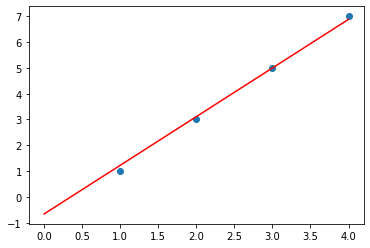

In [34]:
plt.plot(x_data, y_data, 'o')
plt.plot([0, 4], [b, (w*4 + B)], 'r-')

In [35]:
# 학습이 끝난 후 W와 b로 예측

print(history)
print("W :", W)
print("b:", b)
print("input 3", tf.add(tf.matmul([[3.]], W), b))
print("input 4", tf.add(tf.matmul([[4.]], W), b))

[[ 5.8524453e+03 -1.5717225e+00  2.0136080e+00]
 [ 4.5772988e+03 -1.4203058e+00  2.0602453e+00]
 [ 3.5863796e+03 -1.2786946e+00  2.1035388e+00]
 ...
 [ 7.6580001e-04  1.8843564e+00 -6.5712100e-01]
 [ 7.6212239e-04  1.8844955e+00 -6.5753359e-01]
 [ 7.5846014e-04  1.8846345e+00 -6.5794569e-01]]
W : <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[1.8846345]], dtype=float32)>
b: <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[-0.6579457]], dtype=float32)>
input 3 tf.Tensor([[4.995958]], shape=(1, 1), dtype=float32)
input 4 tf.Tensor([[6.8805923]], shape=(1, 1), dtype=float32)


Text(0, 0.5, 'loss')

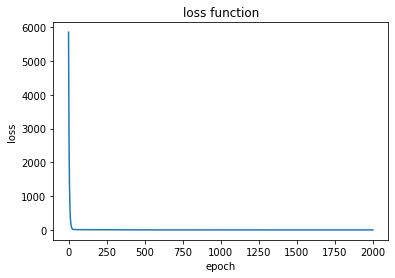

In [36]:
# loss function
plt.plot(history[:,0])
plt.title('loss function')
plt.xlabel('epoch')
plt.ylabel('loss')  

In [37]:
a = np.array(w_trace)
a = a.reshape(8000,1)

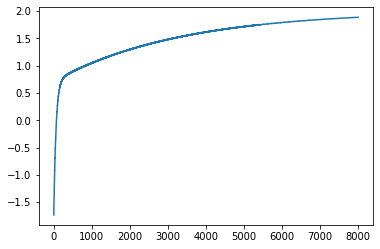

In [38]:
plt.plot(a)

### Multi Regression

In [27]:
import tensorflow as tf
import numpy as np
## data 선언
x_data = [[2.,0.,7.], [6.,4.,2.], [5.,2.,4.],[8.,4.,1]]
y_data = [[75], [95], [91], [97]]
test_data=[[5.,5.,5.]]
print(len(x_data),len(x_data[1]))  # 행크기 , 열크기

4 3


In [28]:
## tf.keras를 활용한 perceptron 모델 구현.
model = tf.keras.Sequential()   ## 모델 만들기 위해 sequential 매서드를 선언. 이를 통해 모델을 만들 수 있다.
model.add(tf.keras.layers.Dense(1, input_dim=3)) # 선언된 모델에 add를 통해 쌓아감. , 현재는 입력 변수 갯수 3, perceptron 1개.
model.summary() ## 설계한 모델 프린트

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss = tf.keras.losses.mse # mean squre error
optimizer = tf.keras.optimizers.SGD(lr=0.01)
metrics = tf.keras.metrics.mae # mean absolute error ㅣ예측값 - 정답ㅣ

# 모델 컴파일하기
model.compile(loss=loss, optimizer=optimizer, metrics=[metrics])

# 모델 동작하기
model.fit(x_data, y_data, epochs=20, batch_size=2)

In [30]:
# 결과를 출력
print(model.weights)
print("test data [5., 5., 5.] 예측 값 :", model.predict(test_data))

[<tf.Variable 'dense/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[9.281991 ],
       [3.9444592],
       [8.074075 ]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([2.0359561], dtype=float32)>]
test data [5., 5., 5.] 예측 값 : [[108.53858]]


### Binary Classification

In [6]:

import tensorflow as tf

## data 선언
x_data = [[0.,0.], [0.,1.], [1.,0.],[1.,1.]]
y_data = [[0.], [1.], [1.], [1.]]
test_data=[[0.8, 0.8]]



In [7]:
## tf.keras를 활용한 perceptron 모델 구현.
model = tf.keras.Sequential()   ## 모델 만들기 위해 sequential 매서드를 선언. 이를 통해 모델을 만들 수 있다.
model.add(tf.keras.layers.Dense(1, input_dim=2)) # 선언된 모델에 add를 통해 쌓아감. , 현재는 입력 변수 갯수 3, perceptron 1개.
model.summary() ## 설계한 모델 프린트

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [11]:
loss = tf.keras.losses.mse # mean squre error
optimizer = tf.keras.optimizers.SGD(lr=0.01)
metrics = tf.keras.metrics.mae # mean absolute error ㅣ예측값 - 정답ㅣ

# 모델 컴파일하기
model.compile(loss=loss, optimizer=optimizer, metrics=[metrics])

# 모델 동작하기
model.fit(x_data, y_data, epochs=20, batch_size=4)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
1/1 [==============================] - 0s 226ms/step - loss: 0.2170 - mean_absolute_error: 0.4466
Epoch 2/20
1/1 [==============================] - 0s 4ms/step - loss: 0.2135 - mean_absolute_error: 0.4416
Epoch 3/20
1/1 [==============================] - 0s 6ms/step - loss: 0.2102 - mean_absolute_error: 0.4368
Epoch 4/20
1/1 [==============================] - 0s 6ms/step - loss: 0.2071 - mean_absolute_error: 0.4321
Epoch 5/20
1/1 [==============================] - 0s 9ms/step - loss: 0.2042 - mean_absolute_error: 0.4275
Epoch 6/20
1/1 [==============================] - 0s 8ms/step - loss: 0.2013 - mean_absolute_error: 0.4230
Epoch 7/20
1/1 [==============================] - 0s 4ms/step - loss: 0.1987 - mean_absolute_error: 0.4187
Epoch 8/20
1/1 [==============================] - 0s 4ms/step - loss: 0.1961 - mean_absolute_error: 0.4145
Epoch 9/20
1/1 [==============================] - 0s 5ms/step - loss: 0.1937 - mean_absolute_error: 0.4104
Epoch 10/20
1/1 [==================

In [12]:
print(model.weights)
print("test data [0.8, 0.8] 예측 값 :", model.predict(test_data))

if model.predict(test_data) >0.5:
    print("합격")
else:
    print("불합격")

[<tf.Variable 'dense_1/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-0.0297911 ],
       [ 0.10808301]], dtype=float32)>, <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([0.68324846], dtype=float32)>]
test data [0.8, 0.8] 예측 값 : [[0.745882]]
합격


### Logistic Regression

In [13]:

import tensorflow as tf

## data 선언
x_data = [[5.], [30.], [95.], [100.], [265.], [270.], [290.], [300.],[365.]]
y_data = [[0.], [0.], [0.], [0.], [1.], [1.], [1.], [1.], [1.]]
test_data= [[7.]]
test_data2= [[80.]]
test_data3= [[110.]]
test_data4= [[180.]]
test_data5= [[320.]]



In [15]:
## tf.keras를 활용한 perceptron 모델 구현.
model = tf.keras.Sequential()   ## 모델 만들기 위해 sequential 매서드를 선언. 이를 통해 모델을 만들 수 있다.
model.add(tf.keras.layers.Dense(1, input_dim=1, activation='sigmoid')) # 선언된 모델에 add를 통해 쌓아감. , 현재는 입력 변수 갯수 3, perceptron 1개.
model.summary() ## 설계한 모델 프린트

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss = tf.keras.losses.mse # mean squre error
optimizer = tf.keras.optimizers.SGD(lr=0.01)
metrics = tf.keras.metrics.binary_accuracy # mean absolute error ㅣ예측값 - 정답ㅣ

# 모델 컴파일하기
model.compile(loss=loss, optimizer=optimizer, metrics=[metrics])

# 모델 동작하기
model.fit(x_data, y_data, epochs=1500, batch_size=2)

In [20]:
# 결과를 출력합니다.
print(" test data [7.] 예측 값 : ", model.predict(test_data))
print(" test data [80.] 예측 값 : ", model.predict(test_data2))
print(" test data [110.] 예측 값 : ", model.predict(test_data3))
print(" test data [180.] 예측 값 : ", model.predict(test_data4))
print(" test data [320.] 예측 값 : ", model.predict(test_data5))

 test data [7.] 예측 값 :  [[0.00817195]]
 test data [80.] 예측 값 :  [[1.5137941e-23]]
 test data [110.] 예측 값 :  [[4.5550747e-32]]
 test data [180.] 예측 값 :  [[0.]]
 test data [320.] 예측 값 :  [[0.]]


### XOR Problem

In [1]:

import tensorflow as tf

## data 선언
x_data = [[0., 0.],[0. ,1.],[1. ,0.],[1. ,1.]]
y_data = [[0.],[1.],[1.],[0.]]
test_data = [[0.5, 0.5]]




In [2]:
## tf.keras를 활용한 perceptron 모델 구현.
model = tf.keras.Sequential()   ## 모델 만들기 위해 sequential 매서드를 선언. 이를 통해 모델을 만들 수 있다.
model.add(tf.keras.layers.Dense(4, input_dim=2, activation='sigmoid')) # 선언된 모델에 add를 통해 쌓아감. , 현재는 입력 변수 갯수 3, perceptron 1개. 비선형 모델은 activation써야 합니다.
model.add(tf.keras.layers.Dense(5, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary() ## 설계한 모델 프린트

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 25        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss = tf.keras.losses.binary_crossentropy # mean squre error
optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)
metrics = tf.keras.metrics.binary_accuracy # mean absolute error ㅣ예측값 - 정답ㅣ

# 모델 컴파일하기
model.compile(loss=loss, optimizer=optimizer, metrics=[metrics])

# 모델 동작하기
model.fit(x_data, y_data, epochs=2000, batch_size=4)

In [4]:
# 결과를 출력합니다.
print(" test data [[0.5,0.5]] 예측 값 : ", model.predict(test_data))

 test data [[0.5,0.5]] 예측 값 :  [[0.9966531]]


### House Pricing 

In [8]:

import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

## 데이터 읽어오기.
df = pd.read_csv("house_price_of_unit_area.csv")


In [21]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   house age                            414 non-null    float64
 1   distance to the nearest MRT station  414 non-null    float64
 2   number of convenience stores         414 non-null    int64  
 3   latitude                             414 non-null    float64
 4   longitude                            414 non-null    float64
 5   house price of unit area             414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.5 KB


,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [32]:


## key말고 해당하는 value값만 추출해서 입력과 정갑 데이터 분류
x_data = df.copy()
tf.random.set_seed(777) # random seed를 고정해줘서 돌릴때마다 랜던값을 고정 

#X = df.iloc[:, 0:5]
#Y = df.iloc[:, 5:6]

In [33]:
y_data = x_data.pop("house price of unit area")

In [34]:
print(y_data)

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: house price of unit area, Length: 414, dtype: float64


In [35]:
print(x_data)

     house age  distance to the nearest MRT station  ...  latitude  longitude
0         32.0                             84.87882  ...  24.98298  121.54024
1         19.5                            306.59470  ...  24.98034  121.53951
2         13.3                            561.98450  ...  24.98746  121.54391
3         13.3                            561.98450  ...  24.98746  121.54391
4          5.0                            390.56840  ...  24.97937  121.54245
..         ...                                  ...  ...       ...        ...
409       13.7                           4082.01500  ...  24.94155  121.50381
410        5.6                             90.45606  ...  24.97433  121.54310
411       18.8                            390.96960  ...  24.97923  121.53986
412        8.1                            104.81010  ...  24.96674  121.54067
413        6.5                             90.45606  ...  24.97433  121.54310

[414 rows x 5 columns]


In [36]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, input_dim=5, activation='sigmoid'))
model.add(tf.keras.layers.Dense(128, activation='sigmoid'))
model.add(tf.keras.layers.Dense(256, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                384       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 41,985
Trainable params: 41,985
Non-trainable params: 0
_________________________________________________________________


In [37]:
optimizer=tf.keras.optimizers.SGD(learning_rate=0.04) ### 경사 하강법으로 global min 에 찾아가는 최적화 방법 선언.
loss=tf.keras.losses.mean_squared_error  ## 예측값 과 정답의 오차값 정의.
metrics=tf.keras.metrics.RootMeanSquaredError() ### 학습하면서 평가할 메트릭스 선언언

model.compile(loss =loss, optimizer= optimizer, metrics=[metrics])

In [38]:
result = model.fit(x_data, y_data, epochs=100, batch_size=100)

Epoch 1/100
5/5 [==============================] - 0s 6ms/step - loss: 9846.7002 - root_mean_squared_error: 99.2305
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 1352.0897 - root_mean_squared_error: 36.7708
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 589.3423 - root_mean_squared_error: 24.2764
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 235.6337 - root_mean_squared_error: 15.3504
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 188.5344 - root_mean_squared_error: 13.7308
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 185.0643 - root_mean_squared_error: 13.6038
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 185.3429 - root_mean_squared_error: 13.6141
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 184.9622 - root_mean_squared_error: 13.6001
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 185.567

In [39]:
print(result.history.keys())

dict_keys(['loss', 'root_mean_squared_error'])


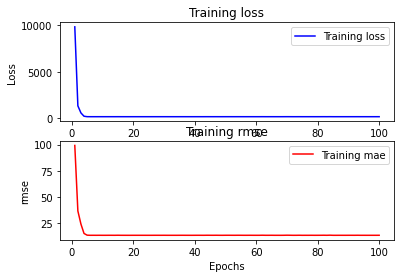

In [40]:
loss = result.history['loss']

# loss 그래프
epochs = range(1, len(loss)+1)
plt.subplot(211)
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

mae = result.history['root_mean_squared_error']
epochs = range(1, len(mae)+1)

# mean absolute error 그래프화
plt.subplot(212)
plt.plot(epochs, mae, 'r-', label='Training mae')
plt.title('Training rmse')
plt.xlabel('Epochs')
plt.ylabel('rmse')
plt.legend()

In [41]:
# x_data -> model -> predict값 - y_data값을 추출

print(model.evaluate(x_data, y_data))
print("\n Test rmse : %.4f" % (model.evaluate(x_data, y_data)[1]))

13/13 [==============================] - 0s 2ms/step - loss: 185.7198 - root_mean_squared_error: 13.6279
[185.7197723388672, 13.627903938293457]
13/13 [==============================] - 0s 1ms/step - loss: 185.7198 - root_mean_squared_error: 13.6279

 Test rmse : 13.6279
